In [76]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/helpers.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/utils_viande.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/models.py /content/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
!pip install -q -U keras-tuner

In [78]:
from helpers import *
from models import *
from utils_viande import *

In [79]:
# Loaded a set of images
root_dir = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"

imgs = get_images(image_dir, 100)
gt_imgs = get_images(gt_dir, 100)

Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_001.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_002.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_003.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_004.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_005.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_006.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_007.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_008.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_009.png
Loading /content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/satImage_010.png
Loading /content/drive/Shareddrives/ML_PROJET2/Pro

### Percentage of background pixels

In [88]:
total_pixels=100*400*400
total_road_pixels=np.count_nonzero(gt_imgs)
total_background_pixels=total_pixels - total_road_pixels
print("Percentage of background pixels is: ", round(100*total_background_pixels / total_pixels,2), '%')
print("Percentage of road pixels is: ", round(100*total_road_pixels / total_pixels,2), '%')

Percentage of background pixels is:  77.47 %
Percentage of road pixels is:  22.53 %


### Figure 1

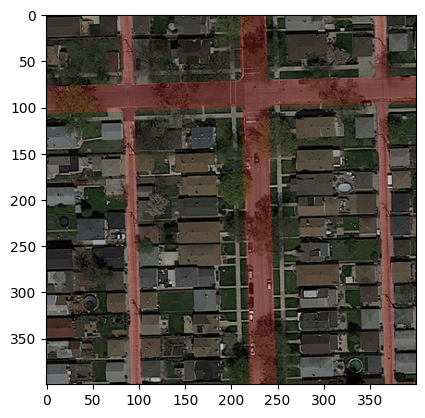

In [81]:
  new_img = make_img_overlay(imgs[45],gt_imgs[45])

  plt.imshow(new_img)

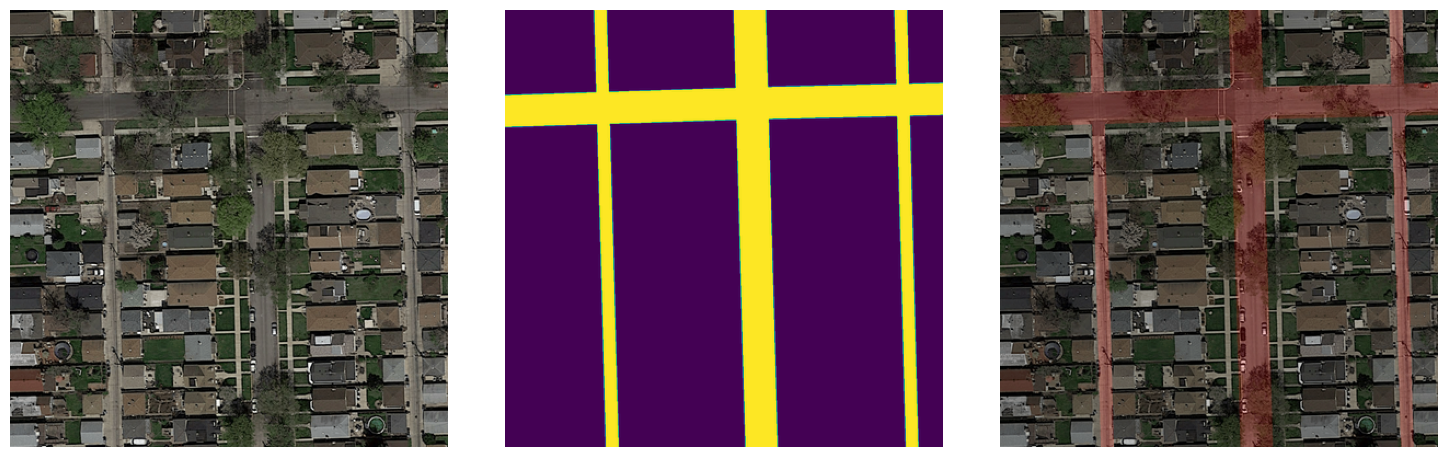

In [85]:
f, axarr = plt.subplots(1,3,figsize=(15, 15))
plt.tight_layout()
axarr[0].imshow(imgs[45])
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[1].imshow(gt_imgs[45])
new_img = make_img_overlay(imgs[45],gt_imgs[45])
axarr[2].imshow(new_img)

# Save the figure to a PDF file
pdf_filename = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data_analysis_figure.pdf"
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# Show the plot (optional)
plt.show()

### Figure 5

In [83]:
#overfitting graph

with open('/content/drive/Shareddrives/ML_PROJET2/Project_2//models/history_N', "rb") as file_pi:
    history_N = pickle.load(file_pi)

plt.figure(figsize=(10, 6))

plt.plot(history_N['loss'])
plt.plot(history_N['val_loss'])
plt.title('Model N')
plt.ylabel('Dice Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validate loss'], loc='upper right')
plt.ylim([0,0.05])
plt.xlim([0,300])
plt.grid()
plt.show()


FileNotFoundError: ignored

### Figure 6

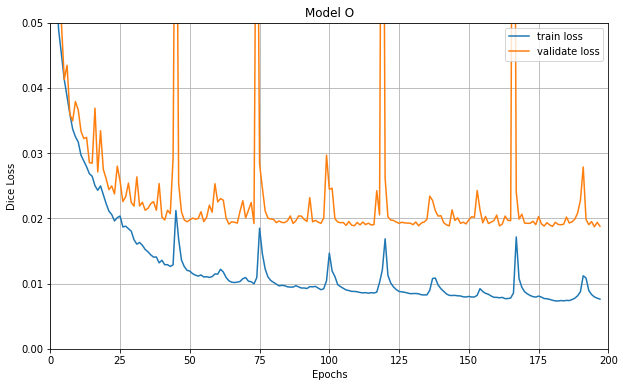

In [ ]:
#overfitting graph

with open('/content/drive/Shareddrives/ML_PROJET2/Project_2/models/history_O', "rb") as file_pi:
    history_O = pickle.load(file_pi)

plt.figure(figsize=(10, 6))

plt.plot(history_O['loss'])
plt.plot(history_O['val_loss'])
plt.title('Model O')
plt.ylabel('Dice Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validate loss'], loc='upper right')
plt.ylim([0,0.05])
plt.xlim([0,200])
plt.grid()
plt.show()
